<a href="https://colab.research.google.com/github/mraniketr/DeepLearningProjects/blob/master/Body_Pose_detection_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import cv2

In [103]:
!pip install wget

In [104]:
!sudo chmod a+x getModels.sh
!./getModels.sh


--2020-09-24 06:45:36--  https://www.dropbox.com/s/2h2bv29a130sgrk/pose_iter_440000.caffemodel
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/2h2bv29a130sgrk/pose_iter_440000.caffemodel [following]
--2020-09-24 06:45:36--  https://www.dropbox.com/s/raw/2h2bv29a130sgrk/pose_iter_440000.caffemodel
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccba867ed8fa75f6720ba096739.dl.dropboxusercontent.com/cd/0/inline/A_9cpWwKi6E7S3zMzZhbpH065BvVi9OyNHETiV36VI8sXgOIExUOsUZ2qMIq_2aGXTI--qquVvqvCglCyh56u1x0pKDxxm3ss9Mvz_iHq1Twaa-Iw-Fx24OIsyBH-AnRjQU/file# [following]
--2020-09-24 06:45:36--  https://uccba867ed8fa75f6720ba096739.dl.dropboxusercontent.com/cd/0/inline/A_9cpWwKi6E7S3zMzZhbpH065BvVi9OyNHETiV36VI8sXgOIExUOsUZ2qMIq_2aGXTI--

In [105]:
protoFile = "pose/mpi/pose_deploy_linevec_faster_4_stages.prototxt"
weightsFile = "pose/mpi/pose_iter_160000.caffemodel"
POSE_PAIRS = [[0,1], [1,2], [2,3], [3,4], [1,5], [5,6], [6,7], [1,14], [14,8], [8,9], [9,10], [14,11], [11,12], [12,13] ]
npoints=15

In [127]:
protoFile = "pose/coco/pose_deploy_linevec.prototxt"
weightsFile = "pose/coco/pose_iter_440000.caffemodel"
nPoints = 18
POSE_PAIRS = [ [1,0],[1,2],[1,5],[2,3],[3,4],[5,6],[6,7],[1,8],[8,9],[9,10],[1,11],[11,12],[12,13],[0,14],[0,15],[14,16],[15,17]]

In [128]:
net = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

frame = cv2.imread("2.jpg")

inWidth = frame.shape[1]
inHeight = frame.shape[0]

inpBlob = cv2.dnn.blobFromImage(frame, 1.0 / 255, (inWidth, inHeight), (0, 0, 0), swapRB=False, crop=False)

net.setInput(inpBlob)


In [129]:
output = net.forward()

frameWidth = frame.shape[1]
frameHeight = frame.shape[0]
threshold = 0.1

In [109]:
from google.colab.patches import cv2_imshow

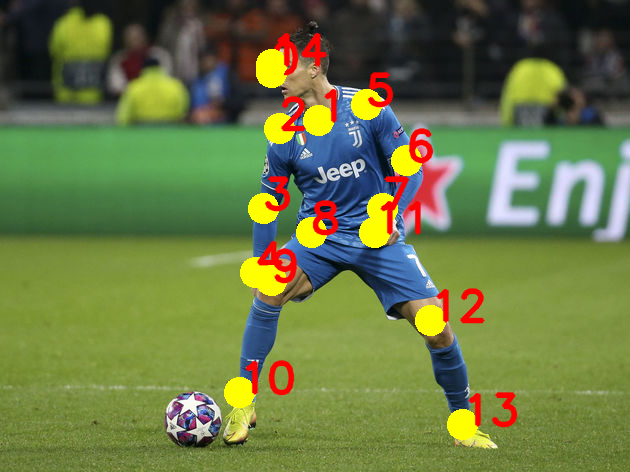

In [130]:
H = output.shape[2]
W = output.shape[3]
# Empty list to store the detected keypoints
points = []
for i in range(npoints):
    # confidence map of corresponding body's part.
    probMap = output[0, i, :, :]

    # Find global maxima of the probMap.
    minVal, prob, minLoc, point = cv2.minMaxLoc(probMap)

    # Scale the point to fit on the original image
    x = (frameWidth * point[0]) / W
    y = (frameHeight * point[1]) / H

    if prob > threshold : 
        cv2.circle(frame, (int(x), int(y)), 15, (0, 255, 255), thickness=-1, lineType=cv2.FILLED)
        cv2.putText(frame, "{}".format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 1.4, (0, 0, 255), 3, lineType=cv2.LINE_AA)

        # Add the point to the list if the probability is greater than the threshold
        points.append((int(x), int(y)))
    else :
        points.append(None)

cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [131]:
for pair in POSE_PAIRS:
    partA = pair[0]
    partB = pair[1]

    if points[partA] and points[partB]:
        cv2.line(frame, points[partA], points[partB], (0, 255, 0), 3)
        cv2.circle(frame, points[partA], 8, (0, 0, 255), thickness=-1, lineType=cv2.FILLED)


IndexError: ignored

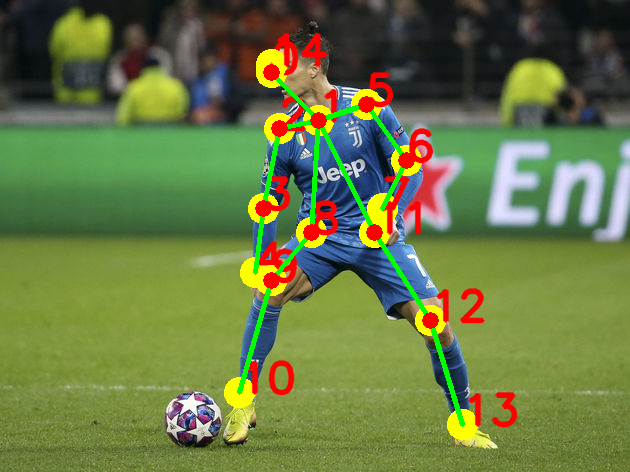

True

In [132]:
# cv2_imshow( frameCopy)
cv2_imshow( frame)


# cv2.imwrite('Output-Keypoints.jpg', frameCopy)
cv2.imwrite('Output-Skeleton.jpg', frame)

# print("Total time taken : {:.3f}".format(time.time() - t))